In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [2]:
#data from may 1996 to july 2014
header_name = ["userId","productId", "rating", "timestamp"]
electronic_rate = pd.read_csv('C:\\Users\\user\\Documents\\IOD\\Project 1 data\\ratings_Electronics.csv', header=None,names=header_name)
electronic_rate.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
electronic_rate.shape

(7824482, 4)

In [4]:
electronic_rate.size

31297928

In [5]:
electronic_rate.dtypes

userId        object
productId     object
rating       float64
timestamp      int64
dtype: object

In [6]:
#drop timestamp as it is not require in this analysis 
#electronic_rate.drop(['timestamp'], axis=1, inplace=True)
#electronic_rate.head()

In [7]:
#check null value 
electronic_rate.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [129]:
#check whether there is duplicated entry of user with the same product 
electronic_rate.duplicated().sum()

0

In [130]:
#check the data statistic 
electronic_rate.describe()

,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [125]:
#convert timestamp into date time 
electronic_rate['timestamp'] = pd.to_datetime(electronic_rate['timestamp'], unit='s' )
electronic_rate.rename(columns={'timestamp': 'Date'}, inplace=True)
electronic_rate.head()

,userId,productId,rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


In [126]:
electronic_rate.tail()

,userId,productId,rating,Date
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,2014-04-04
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,2011-08-15
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,2014-07-01
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,2011-02-13
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,2011-08-07


In [127]:
electronic_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   productId  object        
 2   rating     float64       
 3   Date       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 238.8+ MB


In [80]:
#the number of unique userId, productId and rating
electronic_rate.nunique()

userId       4201696
productId     476002
rating             5
timestamp       5489
dtype: int64

In [14]:
#i want to check the no. rating  
electronic_rate.value_counts(['rating'], sort=False)


rating
1.0        901765
2.0        456322
3.0        633073
4.0       1485781
5.0       4347541
dtype: int64

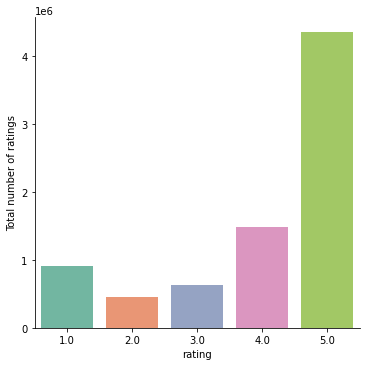

In [122]:
#plot the rating graph
g = sns.catplot(x="rating", kind="count", palette="Set2", data=electronic_rate)
g.set_ylabels("Total number of ratings")

In [81]:
#Top 10 product that got the most number of rating by user ..  
electronic_rate.value_counts('productId')[:10]


productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
dtype: int64

In [18]:
#user that rate the most products . count_rated_user = electronic_rate.groupby('userId').size().sort_values(ascending=False)
most_rated_users = electronic_rate.value_counts('userId')
print(most_rated_users)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2HRB8UOXH92SQ      1
A2HRBA4HO2E4GU      1
A2HRBCM00IDK56      1
A2HRBEBDTIB8MT      1
AZZZY1W55XHZR       1
Length: 4201696, dtype: int64


In [82]:
filtered_df = electronic_rate.groupby("userId")[["userId"]].count()
print(filtered_df)

filtered_df.rename(columns={'userId': 'Number_of_Purchases'}, inplace=True)
filtered_df.head()

                       userId
userId                       
A00000262KYZUE4J55XGL       1
A000063614T1OE0BUSKUT       2
A00009182QVLSWIGHLS1B       1
A00009661LC9LQPGKJ24G       1
A00010809P09NUU6ZP6H        1
...                       ...
AZZZOVIBXHGDR               3
AZZZRS1YZ8HVP               2
AZZZSIK7NFFVP               1
AZZZWXXUPZ1F3               1
AZZZY1W55XHZR               1

[4201696 rows x 1 columns]


,Number_of_Purchases
userId,
A00000262KYZUE4J55XGL,1
A000063614T1OE0BUSKUT,2
A00009182QVLSWIGHLS1B,1
A00009661LC9LQPGKJ24G,1
A00010809P09NUU6ZP6H,1


In [83]:
morethan50_user_rating = filtered_df[filtered_df.Number_of_Purchases >= 50]
morethan50_user_rating.sort_values(by='Number_of_Purchases',ascending=False)


,Number_of_Purchases
userId,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406
...,...
A2ER8G4JJJ7XER,50
A2F4HP0J5VNOYR,50
A17RFKCYS69M3Y,50


In [107]:
print(morethan30_user_rating)

                userId_count
userId                      
A100UD67AHFODS           116
A100WO06OQR8BQ           132
A10471FSILZ25C            32
A105S56ODHGJEK            68
A105TOJ6LTVMBG            71
...                      ...
AZV2U6GU5QA6C             46
AZWQEM8GKXQ5Y             37
AZYJE40XW6MFG             43
AZZ2DEE2NTIM7             46
AZZYW4YOE1B6E             35

[5276 rows x 1 columns]


In [31]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x0000016FFA394CA0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical 

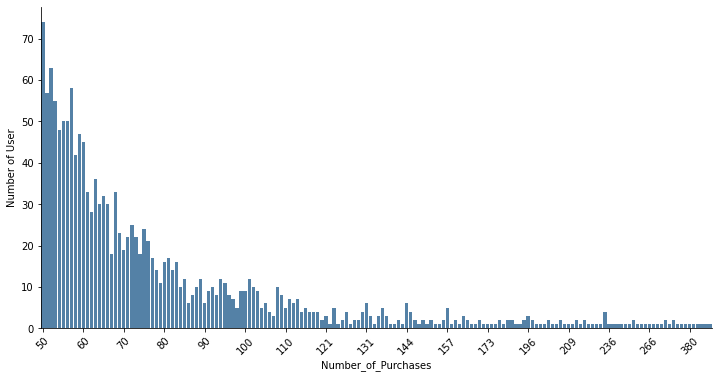

In [275]:


j = sns.catplot(x="Number_of_Purchases", data=morethan50_user_rating, aspect=2, kind="count", color='steelblue')
j.set_ylabels("Number of User")
j.set_xticklabels(step=10, rotation=45)


In [128]:
# check the date range 
date_df = electronic_rate['Date']


0         2013-04-13
1         2012-07-01
2         2013-04-29
3         2013-07-22
4         2012-04-18
             ...    
7824477   2014-04-04
7824478   2011-08-15
7824479   2014-07-01
7824480   2011-02-13
7824481   2011-08-07
Name: Date, Length: 7824482, dtype: datetime64[ns]


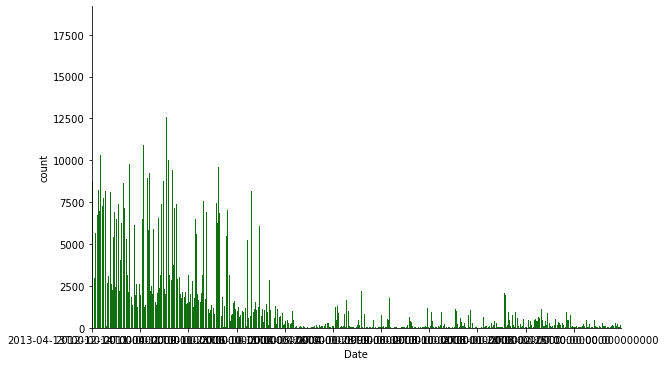

In [134]:
date_l = sns.catplot(x="Date", data=electronic_rate, aspect=2, kind="count", color='Green')
date_l.set_xticklabels(step=500)

In [140]:
electronic_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   productId  object        
 2   rating     float64       
 3   Date       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 238.8+ MB


In [183]:
date_all = (date_df > '1998-1-1') & (date_df <= '2014-12-31')
print(electronic_rate.loc[date_all])

                 userId   productId  rating       Date
0         AKM1MP6P0OYPR  0132793040     5.0 2013-04-13
1        A2CX7LUOHB2NDG  0321732944     5.0 2012-07-01
2        A2NWSAGRHCP8N5  0439886341     1.0 2013-04-29
3        A2WNBOD3WNDNKT  0439886341     3.0 2013-07-22
4        A1GI0U4ZRJA8WN  0439886341     1.0 2012-04-18
...                 ...         ...     ...        ...
7824477  A2YZI3C9MOHC0L  BT008UKTMW     5.0 2014-04-04
7824478  A322MDK0M89RHN  BT008UKTMW     5.0 2011-08-15
7824479  A1MH90R0ADMIK0  BT008UKTMW     4.0 2014-07-01
7824480  A10M2KEFPEQDHN  BT008UKTMW     4.0 2011-02-13
7824481  A2G81TMIOIDEQQ  BT008V9J9U     5.0 2011-08-07

[7824482 rows x 4 columns]


In [180]:
date1998 = sum((date_df > '1998-1-1') & (date_df <= '1998-12-31'))
print(date1998)

4


In [182]:
date1999 = sum((date_df > '1999-1-1') & (date_df <= '1999-12-31'))
print(date1999)

1212


In [184]:
date2000 = sum((date_df > '2000-1-1') & (date_df <= '2000-12-31'))
print(date2000)

9199


In [185]:
date2001 = sum((date_df > '2001-1-1') & (date_df <= '2001-12-31'))
print(date2001)

14717


In [186]:
date2002 = sum((date_df > '2002-1-1') & (date_df <= '2002-12-31'))
print(date2002)

18575


In [187]:
date2003 = sum((date_df > '2003-1-1') & (date_df <= '2003-12-31'))
print(date2003)

23035


In [188]:
date2004 = sum((date_df > '2004-1-1') & (date_df <= '2004-12-31'))
print(date2004)

31170


In [189]:
date2005 = sum((date_df > '2005-1-1') & (date_df <= '2005-12-31'))
print(date2005)

56151


In [190]:
date2006 = sum((date_df > '2006-1-1') & (date_df <= '2006-12-31'))
print(date2006)

86450


In [191]:
date2007 = sum((date_df > '2007-1-1') & (date_df <= '2007-12-31'))
print(date2007)

193161


In [192]:
date2008 = sum((date_df > '2008-1-1') & (date_df <= '2008-12-31'))
print(date2008)

237568


In [193]:
date2009 = sum((date_df > '2009-1-1') & (date_df <= '2009-12-31'))
print(date2009)

324796


In [194]:
date2010 = sum((date_df > '2010-1-1') & (date_df <= '2010-12-31'))
print(date2010)

474791


In [195]:
date2011 = sum((date_df > '2011-1-1') & (date_df <= '2011-12-31'))
print(date2011)

781175


In [196]:
date2012 = sum((date_df > '2012-1-1') & (date_df <= '2012-12-31'))
print(date2012)

1228573


In [213]:
date2013 = sum((date_df > '2013-1-1') & (date_df <= '2013-12-31'))
print(date2013)
print(type(date2013))

2617666
<class 'int'>


In [198]:
date2014 = sum((date_df > '2014-1-1') & (date_df <= '2014-12-31'))
print(date2014)
#print(electronic_rate.loc[date2014])

1697356


                 userId   productId  rating       Date
0         AKM1MP6P0OYPR  0132793040     5.0 2013-04-13
1        A2CX7LUOHB2NDG  0321732944     5.0 2012-07-01
2        A2NWSAGRHCP8N5  0439886341     1.0 2013-04-29
3        A2WNBOD3WNDNKT  0439886341     3.0 2013-07-22
4        A1GI0U4ZRJA8WN  0439886341     1.0 2012-04-18
...                 ...         ...     ...        ...
7824477  A2YZI3C9MOHC0L  BT008UKTMW     5.0 2014-04-04
7824478  A322MDK0M89RHN  BT008UKTMW     5.0 2011-08-15
7824479  A1MH90R0ADMIK0  BT008UKTMW     4.0 2014-07-01
7824480  A10M2KEFPEQDHN  BT008UKTMW     4.0 2011-02-13
7824481  A2G81TMIOIDEQQ  BT008V9J9U     5.0 2011-08-07

[7824482 rows x 4 columns]


[Text(0, 0, '1998'),
 Text(1, 0, '1999'),
 Text(2, 0, '2000'),
 Text(3, 0, '2001'),
 Text(4, 0, '2002'),
 Text(5, 0, '2003'),
 Text(6, 0, '2004'),
 Text(7, 0, '2005'),
 Text(8, 0, '2006'),
 Text(9, 0, '2007'),
 Text(10, 0, '2008'),
 Text(11, 0, '2009'),
 Text(12, 0, '2010'),
 Text(13, 0, '2011'),
 Text(14, 0, '2012'),
 Text(15, 0, '2013'),
 Text(16, 0, '2014')]

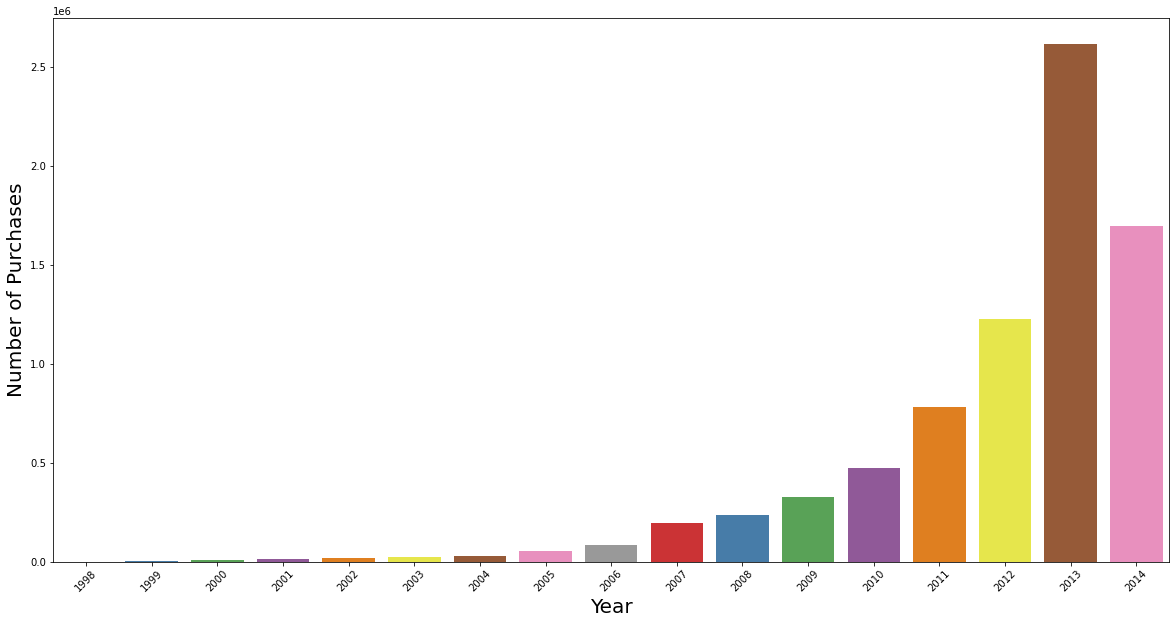

In [272]:
year_date_df = [date1998,date1999, date2000,date2001, date2002, date2003, date2004, date2005, date2006, date2007,date2008, date2009, date2010, date2011, date2012, date2013, date2014]
x = [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]

plt.figure(figsize=(20,10))
year_graph = sns.barplot(x=x, y=year_date_df, palette = "Set1")
year_graph.set_xlabel(xlabel="Year", fontsize = 20)
year_graph.set_ylabel(ylabel = "Number of Purchases", fontsize = 20)
year_graph.set_xticklabels(year_graph.get_xticklabels(), rotation=45 )



#date_graph = sns.catplot(x= x, y = year_data_df,  aspect=2, kind="count", color='Green')
#date_l.set_xticklabels(step=5)